**Classify whether a tumor is malicious (cancer) or benign.**

The decision tree model produces a collection of rules, with each rule represented as an if-else chain from the root to a leaf node. This structure mirrors human reasoning, lending the model high interpretability and making it intuitive for users to understand.


This is to show how to use decision tree for classifcation using tumor dataset,which contains lab test results about tumor samples. The objective is to classify whether a tumor is malicious (cancer) or benign. As such, it is a typical binary classification task

In [109]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Evaluation metrics related methods
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [110]:
tumor_df =pd.read_csv("/Users/a1234/Documents/Anacode/tumor.csv")
#lets initialize random_state =123 
rs=123

In [111]:
tumor_df.head(3)

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0


In [112]:
tumor_df.tail(3)

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
680,5,10,10,3,7,3,8,10,2,1
681,4,8,6,4,3,4,10,6,1,1
682,4,8,8,5,4,5,10,4,1,1


**About the dataset**

This preprocessed and encoded dataset contains observations detailing laboratory test results for tumor samples, encompassing attributes like clumpiness and shape. Our objective is to employ a classification model on this data to discern whether a tumor sample is malignant (cancerous) or benign. Post-analysis, we aim to interpret the model's predictions and gain insights into the factors influencing tumor malignancy.

In [113]:
tumor_df.dtypes

Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [114]:
tumor_df.shape

(683, 10)

Then, let's split the dataframe into train and testing data

In [115]:
# Get the input features
x = tumor_df.iloc[:, :-1]
# Get the target variable
y = tumor_df.iloc[:, -1:]

In [116]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=rs, stratify=y)

**Train a default decision tree**

Training a decision classifier with scikit-learn is straightforward. We start by creating a DecisionTreeClassifier object. Initially, we'll use all the default arguments.

In [117]:
# Train a decision tree with all default arguments
model=DecisionTreeClassifier()

Then we can train the decision tree model with training and testing data

In [118]:
#y_train is one dimensional array we can remove values.ravel.
model.fit(x_train, y_train.values.ravel())


DecisionTreeClassifier()

And make predictions on the test data

In [119]:
preds=model.predict(x_test)

In [120]:
preds

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0])

Here we also provided a utility method to evaluate the trained decision tree model and output some standard evaluation metrics.

In [121]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [122]:
evaluate_metrics(y_test, preds)

{'accuracy': 0.9170731707317074,
 'recall': 0.8472222222222222,
 'precision': 0.9104477611940298,
 'f1score': 0.8776978417266188}

In [123]:
#using finction
def evaluate_metrics(yt, yp,label):
    return pd.Series({'accuracy':accuracy_score(yt, yp),
                    'f1_score':f1_score(yt, yp),
                      'precision':precision_score(yt, yp),
                      'recall':recall_score(yt, yp)},name=label)
results=evaluate_metrics(y_test, preds,'Test Metrics')

In [124]:
results

accuracy     0.917073
f1_score     0.877698
precision    0.910448
recall       0.847222
Name: Test Metrics, dtype: float64

Now we can see that the trained decision model has very good classification results on the testing data, with a very high F1 score around 0.94. Next, let's try to visualize and interpret the trained decision tree model.

**Visualize the trained decision tree**

We will be using the tree.plot_tree() method provided by sklearn to quickly plot any decision tree model.

In [125]:
def plot_decision_tree(model, feature_names):
    plt.subplots(figsize=(25, 20)) 
    tree.plot_tree(model, 
                       feature_names=feature_names,  
                       filled=True)
    plt.show()

In [126]:
feature_names = X.columns.values

In [127]:
feature_names

array(['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit'], dtype=object)

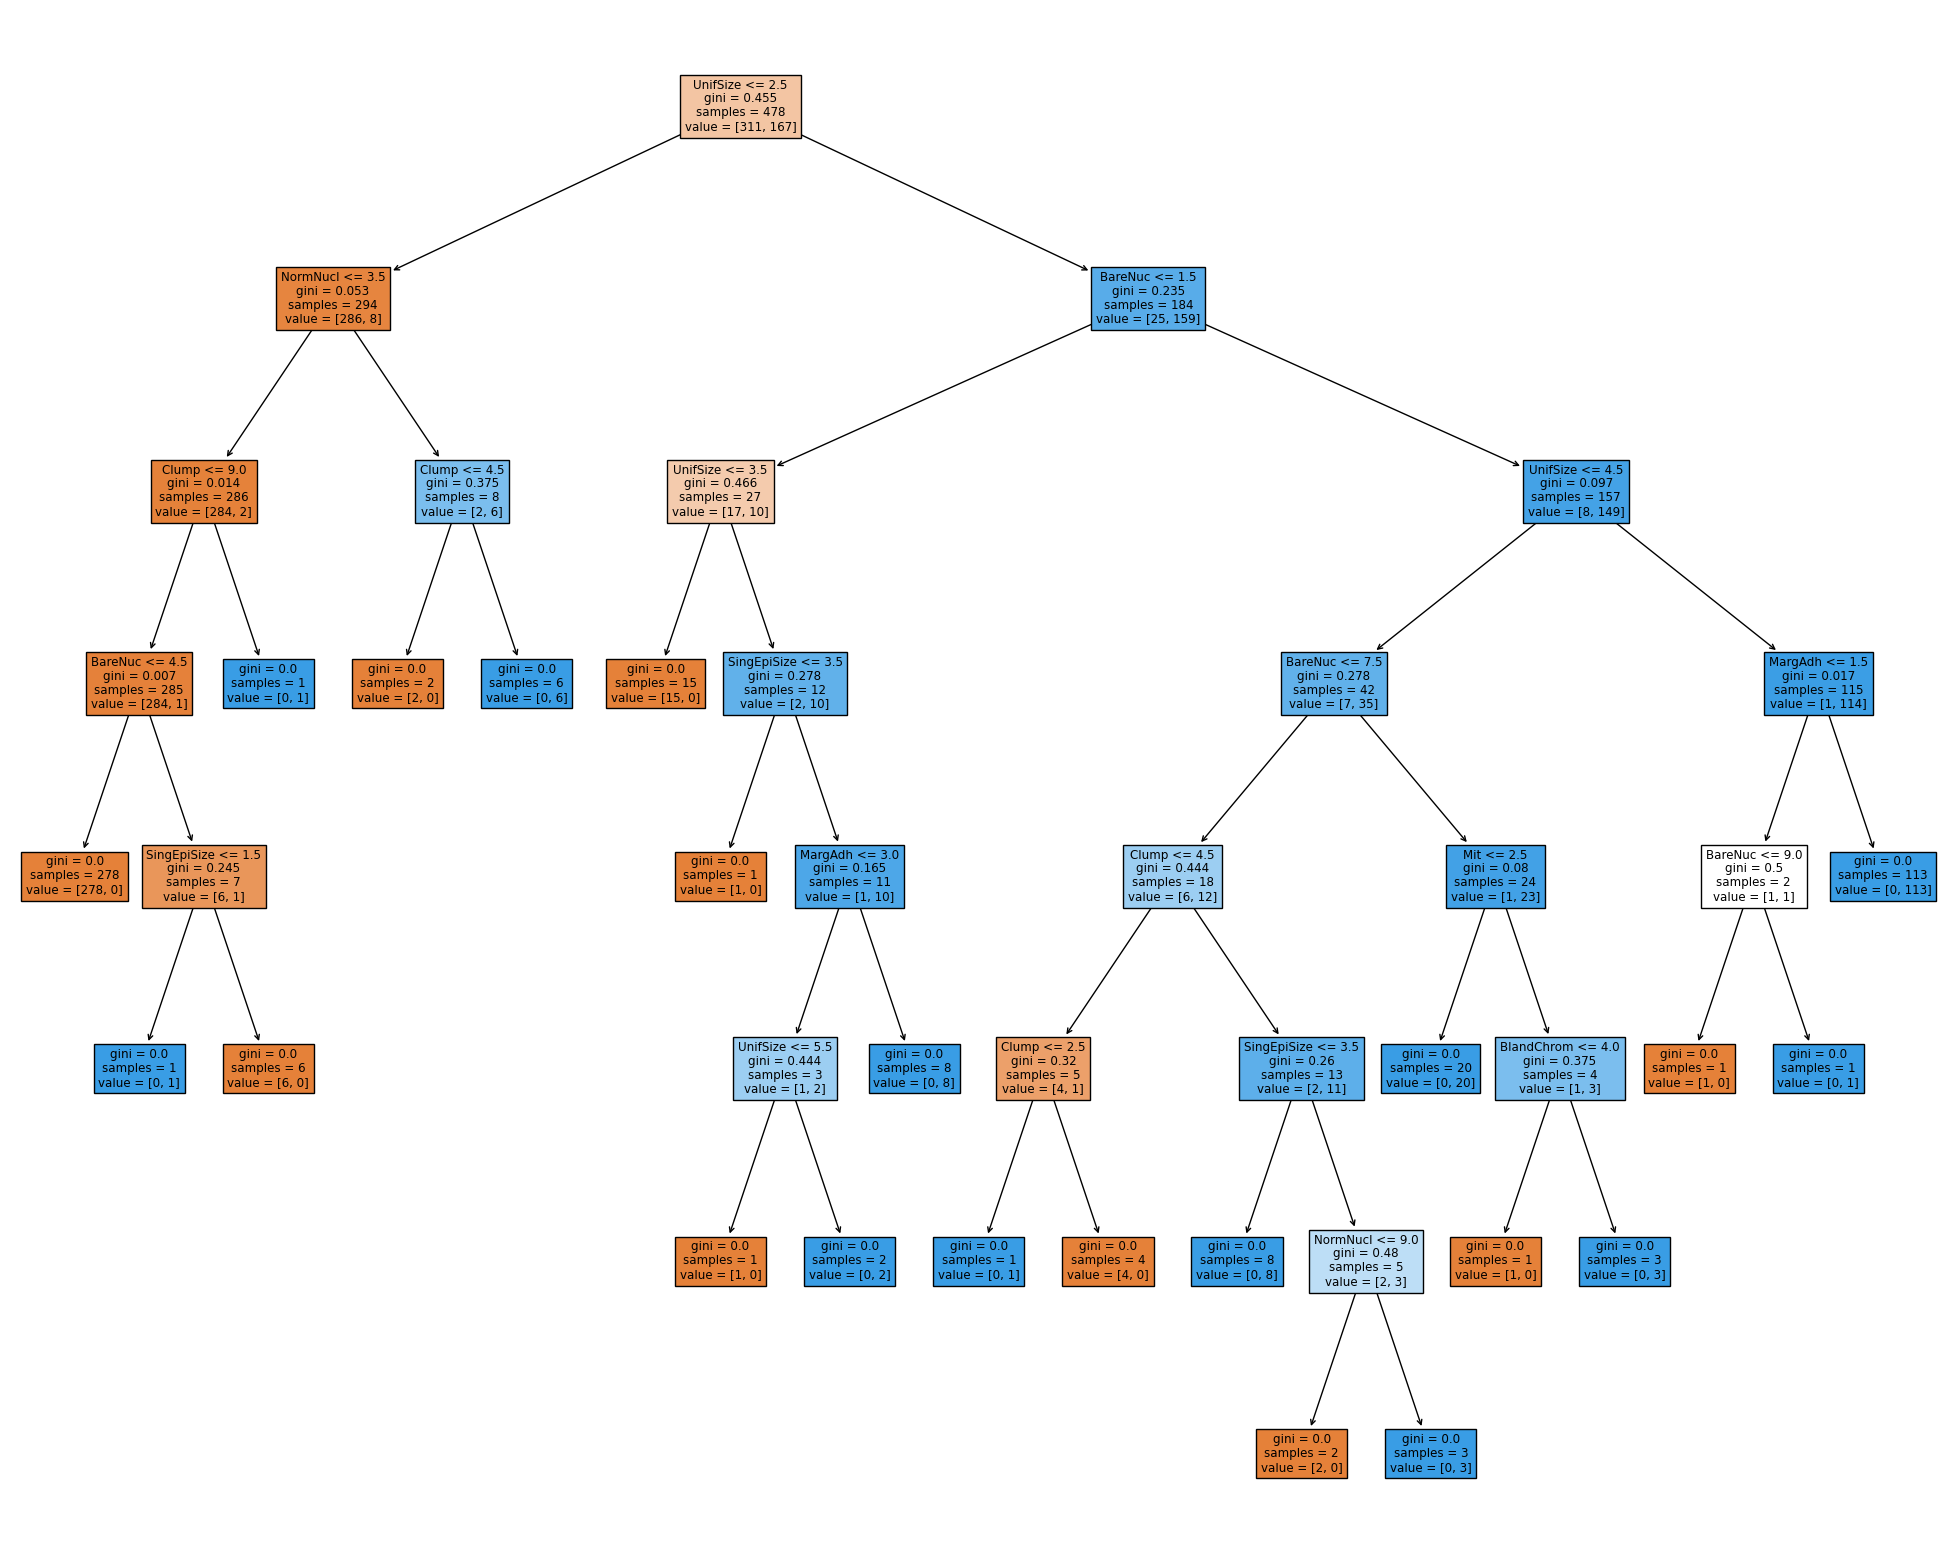

In [128]:
plot_decision_tree(model, feature_names)

You'll observe the rendering of a fairly intricate decision tree model. Initially, note the color-coded nodes: orange nodes signify that a majority of samples within the node belong to Class 0, while blue nodes denote a majority of samples belong to Class 1. White nodes indicate an equal distribution of Class 0 and Class 1 samples.

Given the tree's size, discerning the rules and split thresholds at each node might prove challenging. Moreover, large decision trees often lead to increased variance and the risk of overfitting. Moving forward, we'll endeavor to construct simplified decision trees, with the hope that these streamlined models will yield even better outcomes.

Cutomize the decision tree model
The DecisionTreeClassifier has many arguments (model hyperparameters) that can be customized and eventually tune the generated decision tree classifiers. Among these arguments, there are three commonly tuned arguments as follows:

criterion: gini or entropy, which specifies which criteria to be used when splitting a tree node
max_depth: a numeric value to specify the max depth of the tree.

Larger tree depth normally means larger model complexity
min_samples_leaf: The minimal number of samples in leaf nodes.

Larger samples in leaf nodes will tend to generate simpler trees
Let's first try the following hyperparameter values:

criterion = 'entropy'

max_depth = 10

min_samples_leaf=3

In [129]:
# criterion = 'entropy'
# max_depth = 10
# min_samples_leaf=3
custom_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3, random_state=rs)

And let's train and evaluate the customized model

In [130]:
custom_model.fit(x_train, y_train.values.ravel())
preds = custom_model.predict(x_test)
evaluate_metrics(y_test, preds,"Custom Metrics ")

accuracy     0.960976
f1_score     0.945946
precision    0.921053
recall       0.972222
Name: Custom Metrics , dtype: float64

Its F1 score has increased to 0.946 now, which seems better than the previous default decision tree model.

Then, let's visualize the custom model using plot_decision_tree() utility method we created in the previous step:

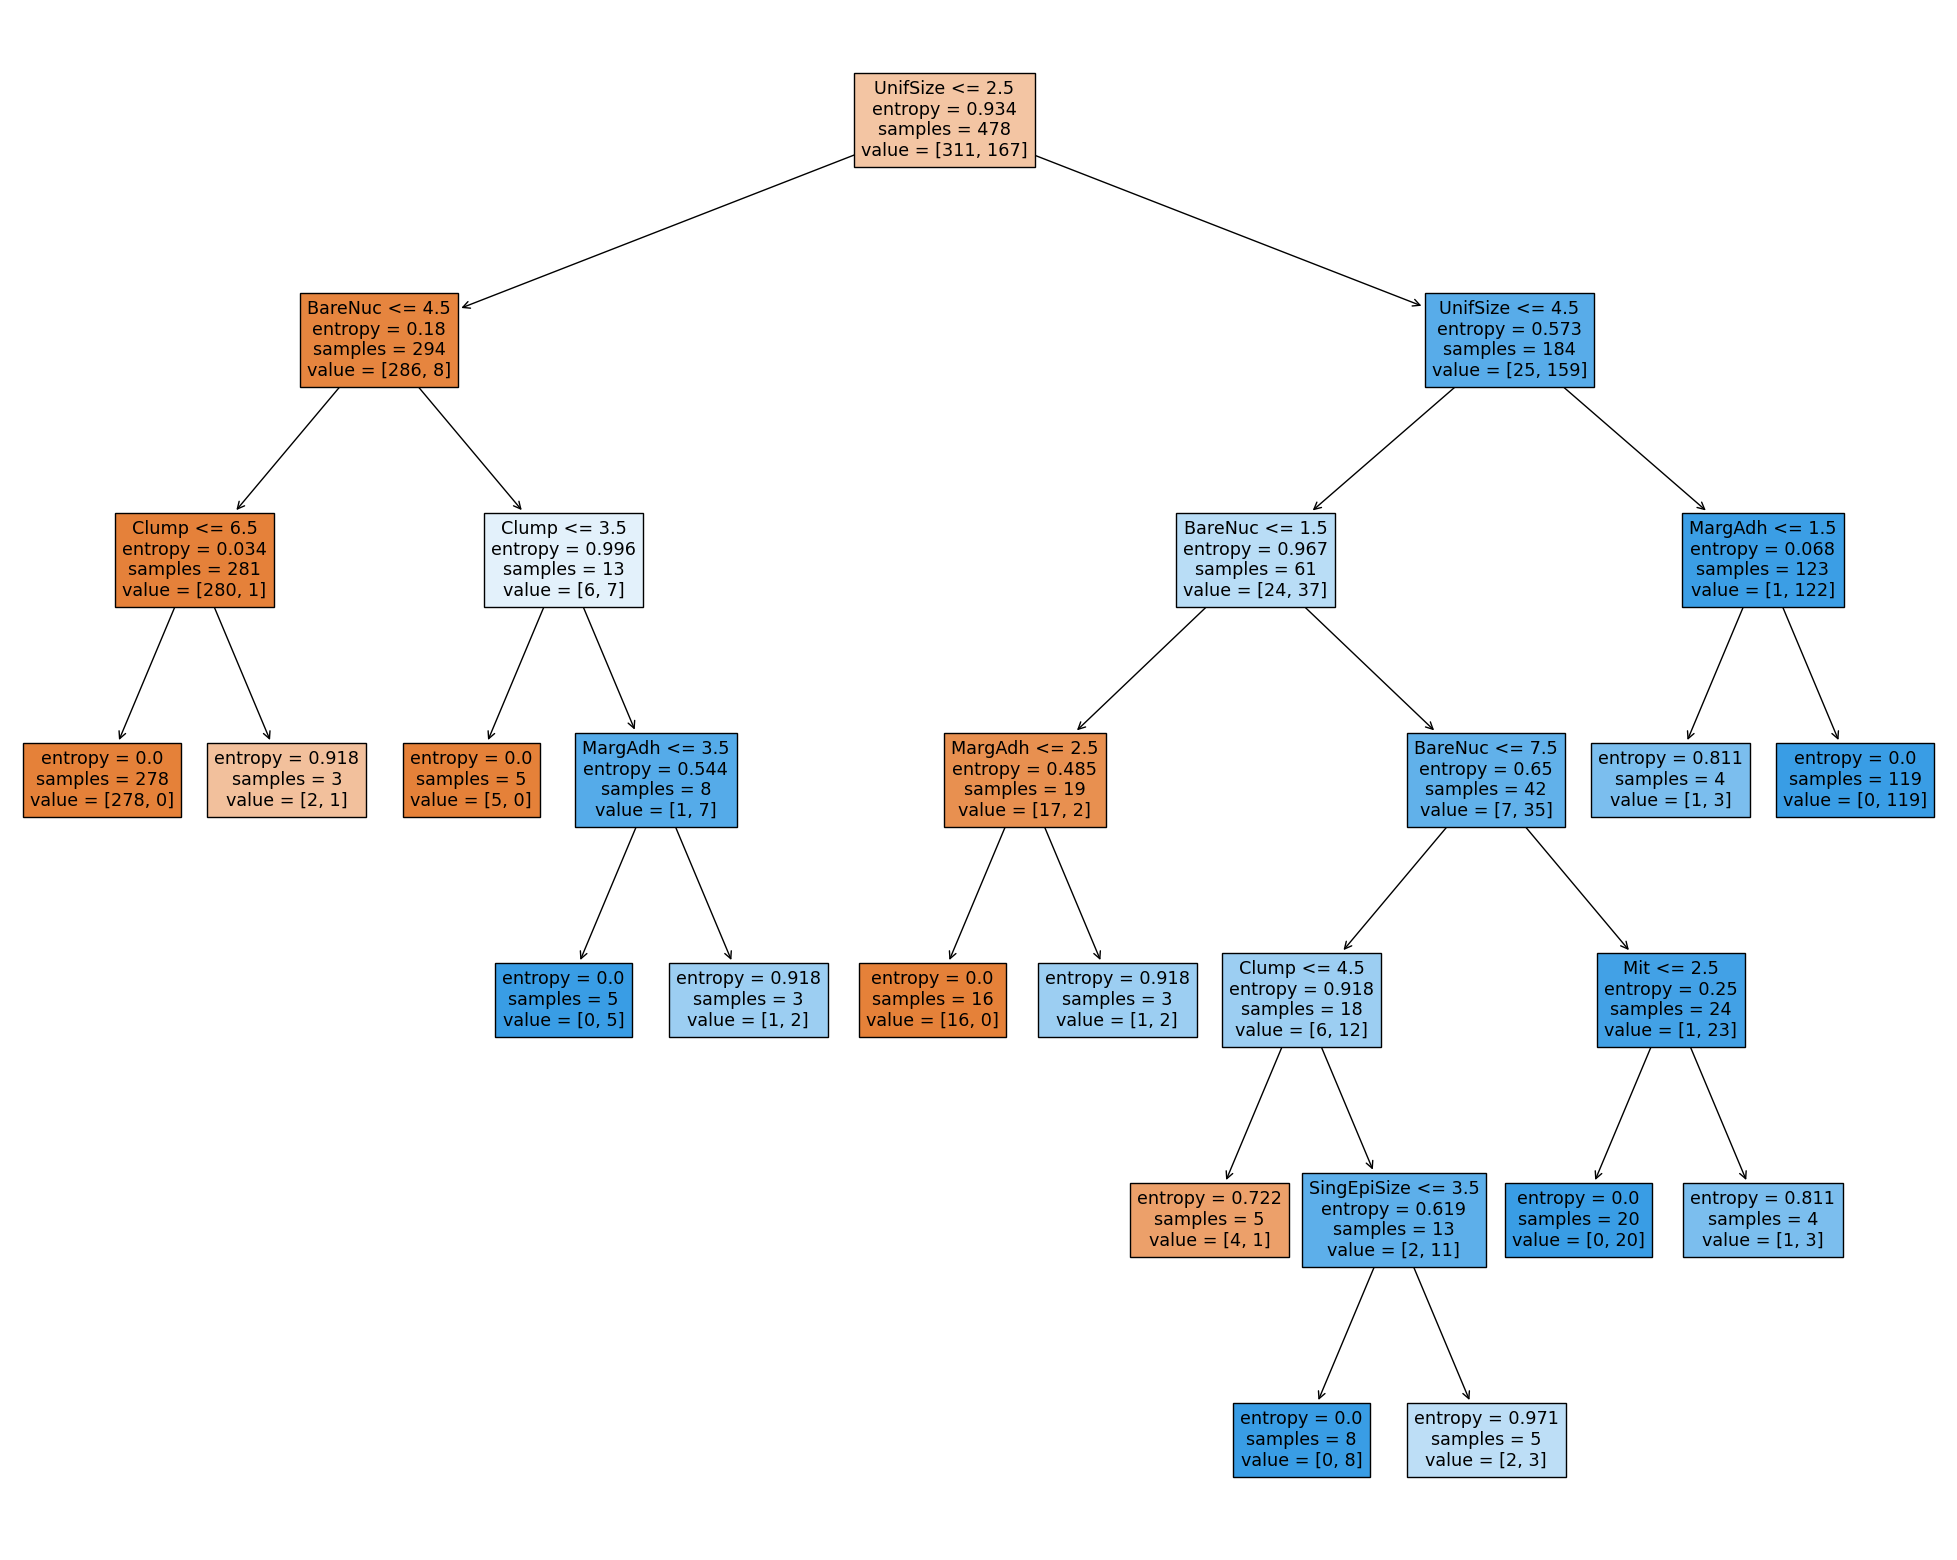

In [131]:
# Plot the decision tree
plot_decision_tree(custom_model, feature_names)

As you can see the tuned decision tree above is much simpler than the default decision tree model. We can see from each node, it's split feature and threshold, and entropy difference before and after a split.

**Further exploration**

**Lets build and visualize a decision tree with criterion='gini', max_depth = 15, and min_samples_leaf=5**

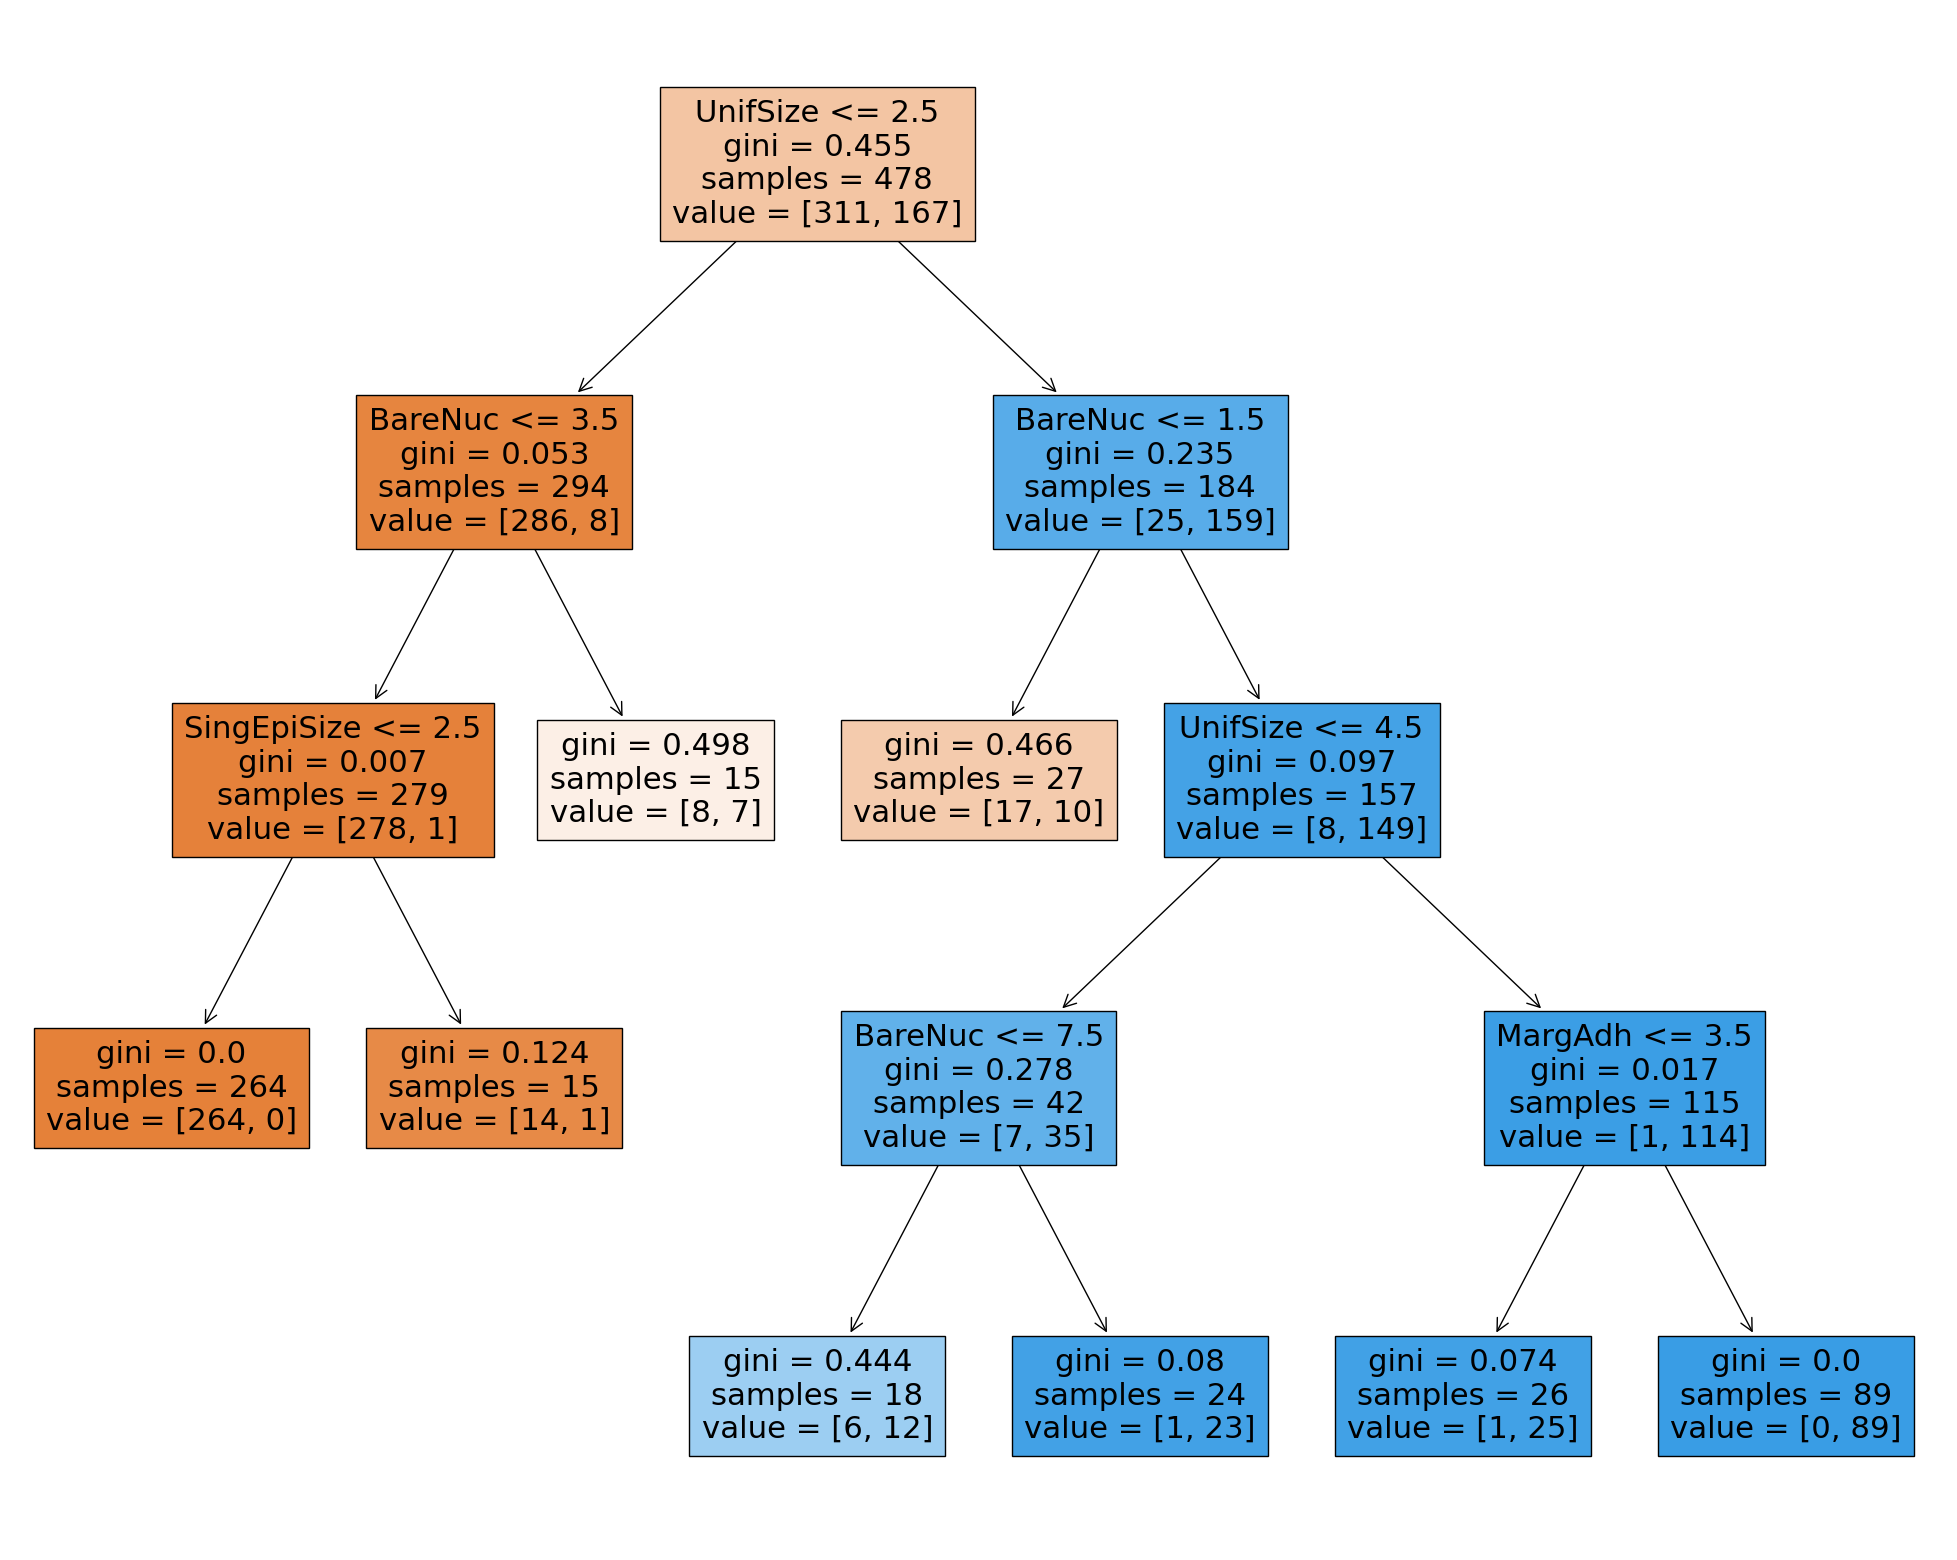

In [134]:
E1_model = DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_leaf=15, random_state=rs)
E1_model.fit(x_train, y_train.values.ravel())
preds = E1_model.predict(x_test)
evaluate_metrics(y_test, preds,"E1_Metrics")
# Plot the decision tree
plot_decision_tree(E1_model, feature_names)

Tune hyperparameters.
    
Lastly, let's try to find the optimized hyperparameters, which can produce the highest F1 score, via GridSearch cross-validation.

We define a params_grid dict object to contain the parameter candidates:

In [135]:
params_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5]
}

Then we create a default decision tree classifier to be tuned:

In [137]:
default_model=DecisionTreeClassifier(random_state=rs)

Ok, now we can use the GridSearchCV to search the best parameters generating the highest F1 score

In [147]:
grid_search = GridSearchCV(estimator =default_model, 
                        param_grid = params_grid, 
                        scoring='f1',
                        cv = 5, verbose = 1)
grid_search.fit(x_train, y_train.values.ravel())
best_params = grid_search.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [148]:
best_params

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2}

So the best parameters are criterion=gini, max_depth=5, and min_samples_leaf=2.

**Now! lets build and visualize a decision tree with the best parameters**

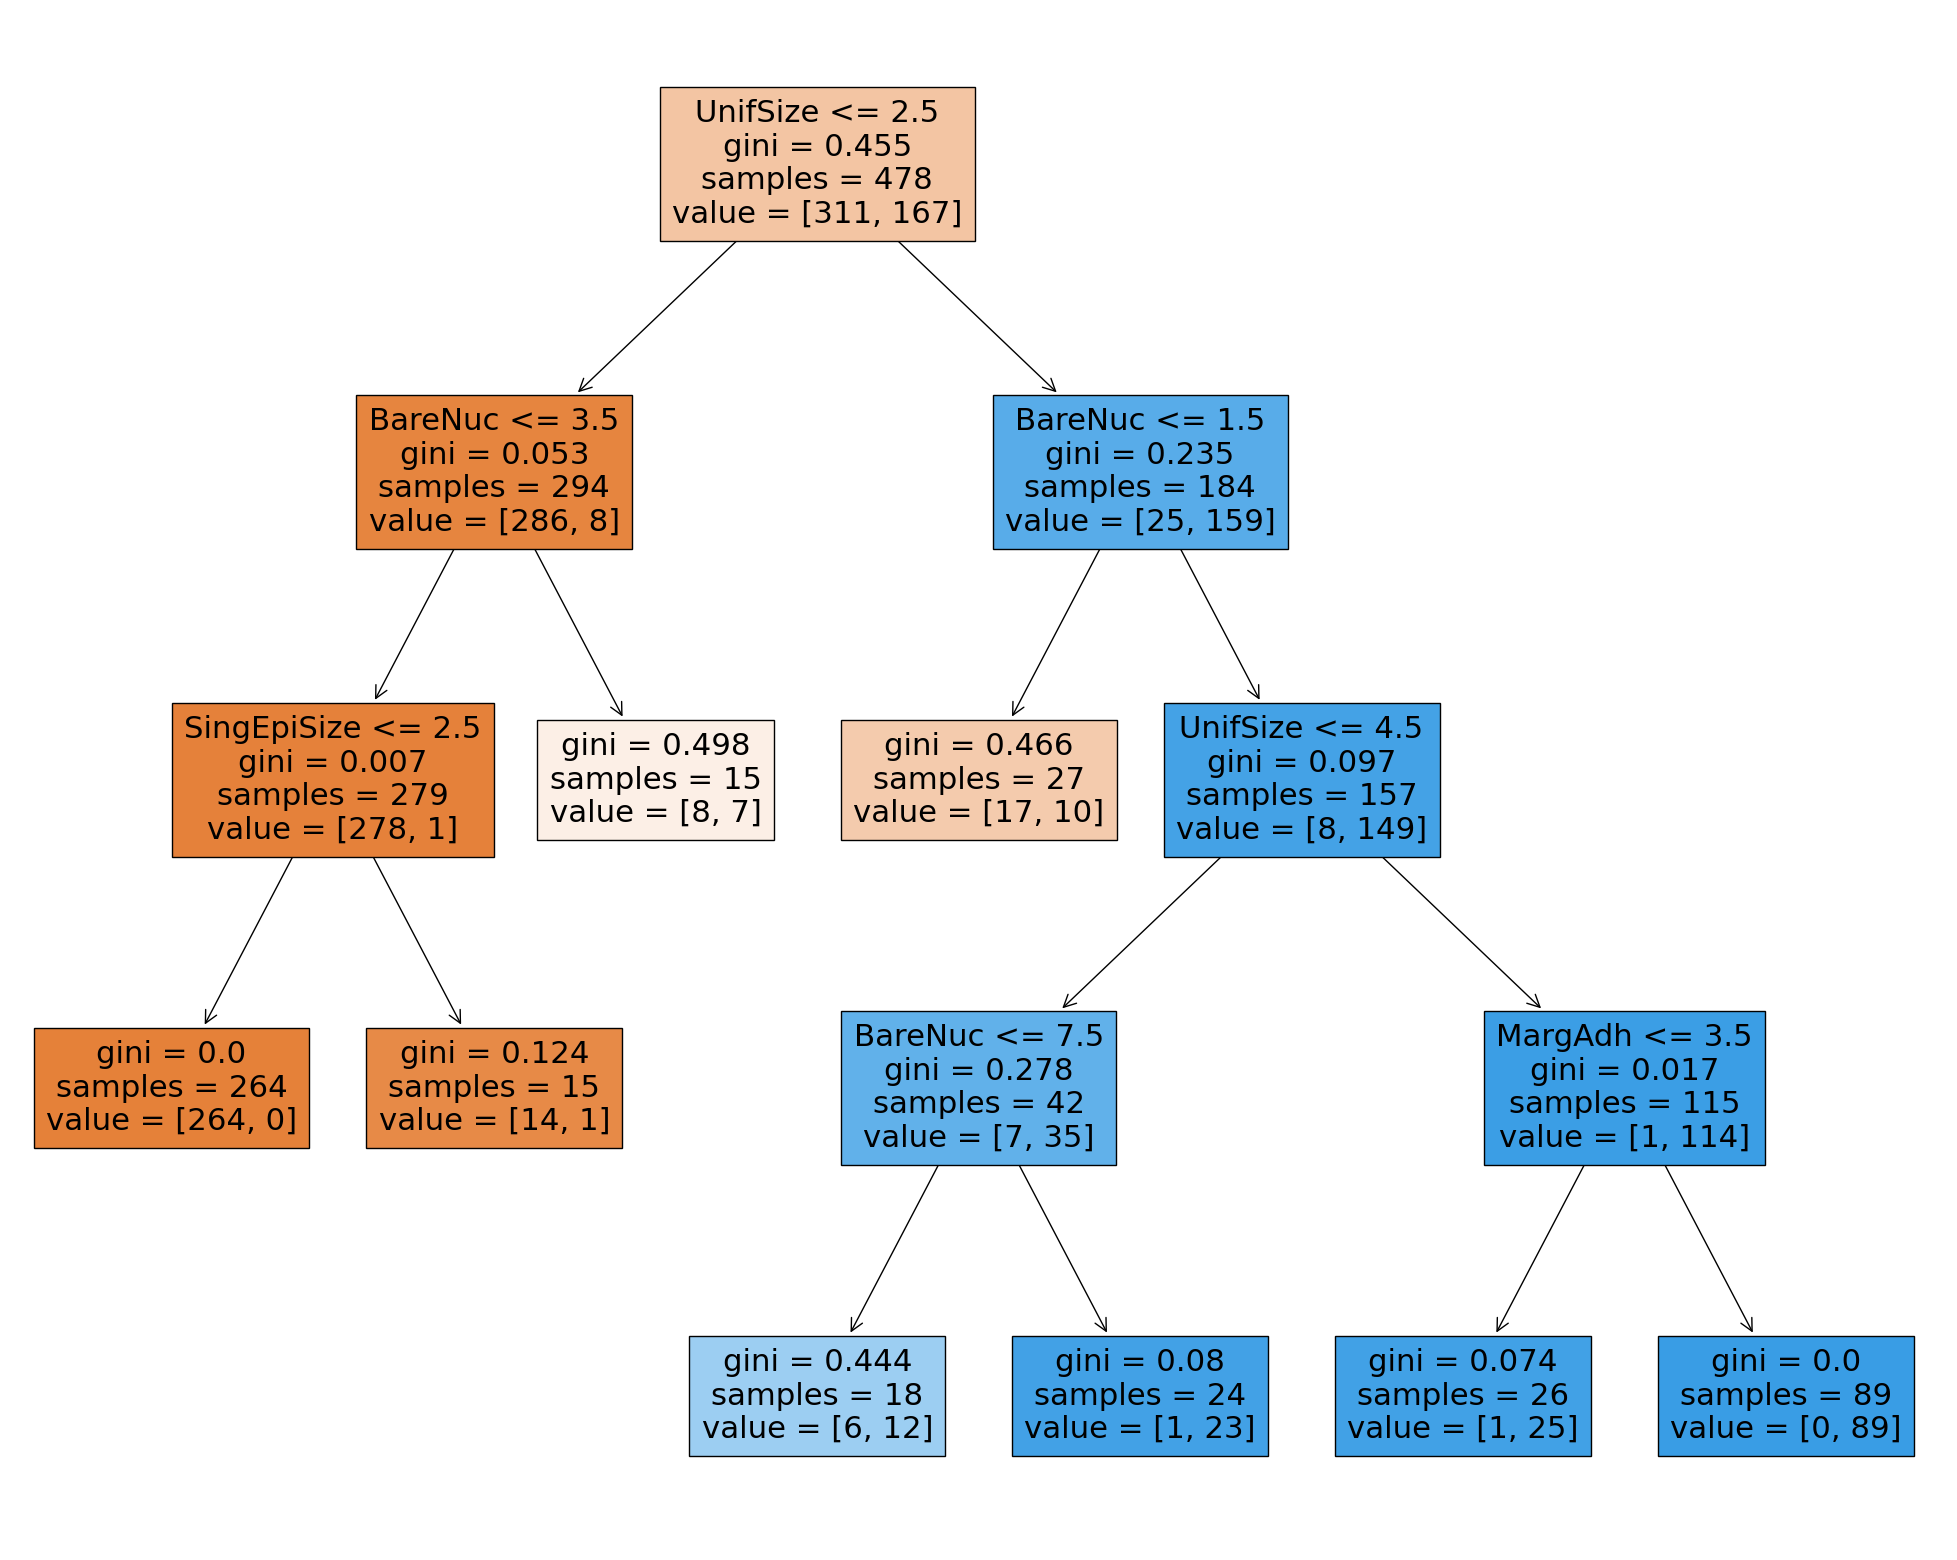

In [149]:
best_model = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=2, random_state=rs)
best_model.fit(x_train, y_train.values.ravel())
preds = best_model.predict(x_test)
evaluate_metrics(y_test, preds,"Best_Metrics")
# Plot the decision tree
plot_decision_tree(E1_model, feature_names)

The decision tree model's F1 score has significantly improved to 0.946 with the customized hyperparameters, which indicates enhanced performance compared to the default settings. By fine-tuning the model's hyperparameters, we were able to optimize its ability to accurately classify tumor samples as malignant or benign.

Key Findings:

**Improved F1 Score:**

The F1 score, a harmonic mean of precision and recall, is a robust measure of a model's performance, especially in imbalanced datasets like this one. The F1 score of 0.946 achieved with the customized decision tree model signifies a substantial improvement over the default model, indicating better balance between precision and recall.


**Optimized Hyperparameters:**

By exploring different combinations of hyperparameters using GridSearchCV, we identified the best configuration for the decision tree model. The selected hyperparameters (criterion=gini, max_depth=5, min_samples_leaf=2) led to the highest F1 score, highlighting their effectiveness in capturing the underlying patterns in the data while avoiding overfitting.


Interpretable Model: 


Decision trees offer intuitive interpretability, allowing us to understand the classification rules used by the model. Visualizing the decision tree graphically provides insights into the key features and their importance in distinguishing between malignant and benign tumor samples. This transparency enhances the model's trustworthiness and facilitates communication with stakeholders.


**Potential Clinical Utility:**

A decision tree model with high accuracy and interpretability holds promise for clinical applications, where understanding the reasoning behind predictions is crucial for informed decision-making. Healthcare professionals can leverage such models to assist in diagnosing tumors and recommending appropriate treatments, ultimately improving patient outcomes.
    

In conclusion, the customized decision tree model with optimized hyperparameters demonstrates superior performance in classifying tumor samples, offering both high accuracy and interpretability. These findings underscore the importance of hyperparameter tuning in maximizing model effectiveness and highlight the potential of decision tree models in clinical decision support systems.